# Worksheet 16

Name:  Jiahang Li
UID: U00295086

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

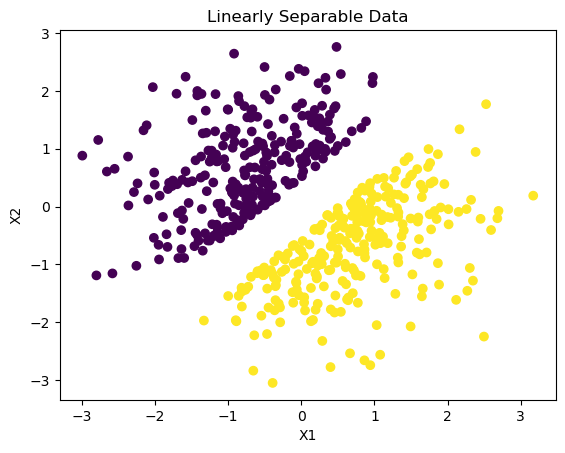

In [3]:
# generate linearly separable data
X, Y = generate_line_data()

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linearly Separable Data")
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [4]:
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_

array([0.05839469])

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

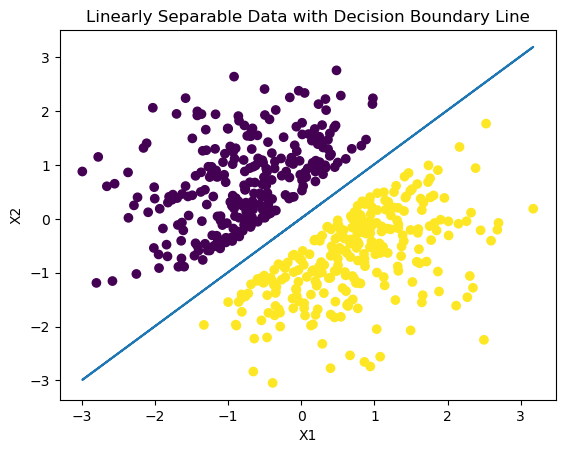

In [5]:
# extract the coefficients
coef = model.coef_[0]

# calculate the slope and intercept of the decision boundary line
slope = -coef[0] / coef[1]
intercept = -model.intercept_ / coef[1]

# plot the scatter plot with decision boundary line
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linearly Separable Data with Decision Boundary Line")
plt.plot(X[:,0], slope * X[:,0] + intercept)
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

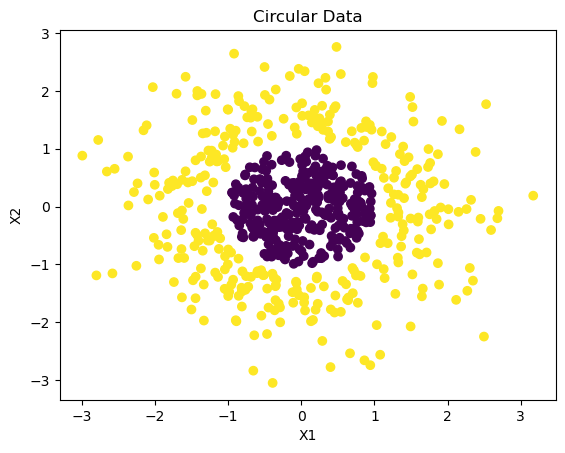

In [6]:
# generate circular data
X, Y = generate_circle_data(t)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Circular Data")
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [7]:
# transform the data
X_transformed = np.c_[X[:,0]**2, X[:,1]**2]

# create a logistic regression model
model = LogisticRegression()

# fit the model to the transformed data
model.fit(X_transformed, Y)

# print out the coefficients
print("Coefficients:", model.coef_)


Coefficients: [[4.91393432 4.9777183 ]]


f) Plot the decision boundary using the code below.

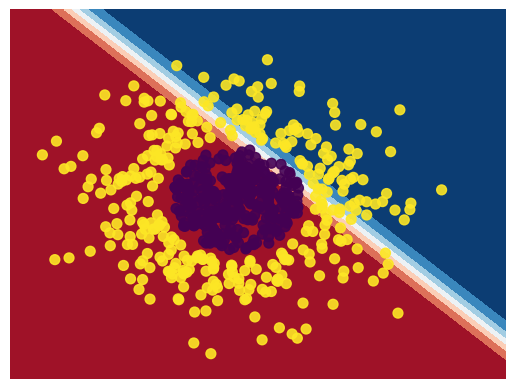

In [8]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

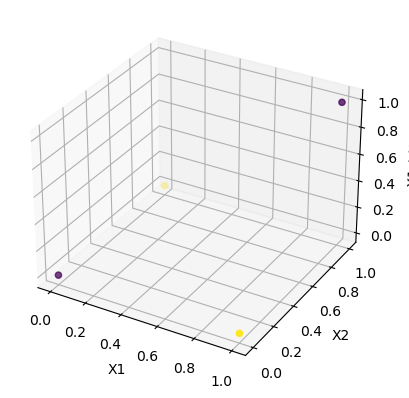

In [17]:
# %matplotlib widget # Requires: pip3 install ipympl

from mpl_toolkits.mplot3d import Axes3D

# Generate XOR data
X, Y = generate_xor_data()
X_interact = np.c_[X, X[:, 0] * X[:, 1]]  # Add interaction term

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_interact[:, 0], X_interact[:, 1], X_interact[:, 2], c=Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1 * X2')
plt.show()


h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

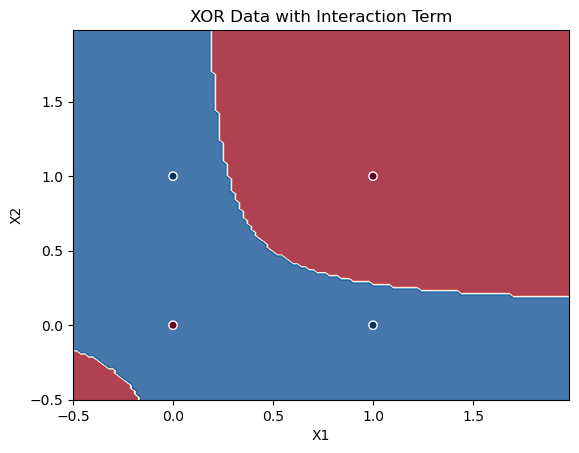

In [18]:
# generate the XOR data
X, Y = generate_xor_data()

# add an interaction term
poly = PolynomialFeatures(interaction_only=True)
X_interact = poly.fit_transform(X)

# create a logistic regression model using the interaction term
lr = LogisticRegression()
model = lr.fit(X_interact, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])

# predict class labels for the mesh data
Z = model.predict(meshData)

# plot the decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu', alpha=.8)

# plot the XOR data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdBu', edgecolor='white')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Data with Interaction Term")
plt.show()


i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Users/lijiahang/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

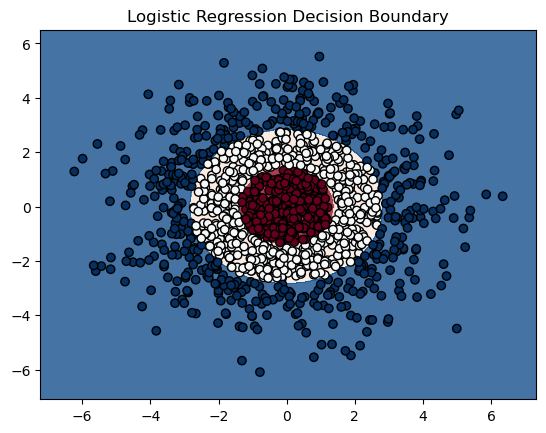

In [23]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

# Generate X and Y data
X, Y = generate_circles_data(t)

# Fit logistic regression model with polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

# Create meshgrid for decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
fig, ax = plt.subplots()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu, edgecolors='k')
ax.set_title('Logistic Regression Decision Boundary')
plt.show()